<a href="https://colab.research.google.com/github/raisinmee/Data-Mining/blob/main/DATMIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT SECTION

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.6 MB/s eta 0:00:00


In [ ]:
# Import libraries
from google.colab import drive
from google.colab import files
import os
import io
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/DATA MINING KELOMPOK 2')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
import joblib
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids

Mounted at /content/drive


In [ ]:
df = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# UNDERSTANDING DATA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
Price,0
Customer ID,135080
Country,0


In [ ]:
missing_desc = df[df['Description'].isna()]
print(missing_desc)

       Invoice StockCode Description  Quantity         InvoiceDate  Price  \
622     536414     22139         NaN        56 2010-12-01 11:52:00    0.0   
1510    536545     21134         NaN         1 2010-12-01 14:32:00    0.0   
1985    536547     37509         NaN         1 2010-12-01 14:33:00    0.0   
1986    536546     22145         NaN         1 2010-12-01 14:33:00    0.0   
2022    536552     20950         NaN         1 2010-12-01 14:34:00    0.0   
...        ...       ...         ...       ...                 ...    ...   
535322  581199     84581         NaN        -2 2011-12-07 18:26:00    0.0   
535326  581203     23406         NaN        15 2011-12-07 18:31:00    0.0   
535332  581209     21620         NaN         6 2011-12-07 18:35:00    0.0   
536981  581234     72817         NaN        27 2011-12-08 10:33:00    0.0   
538554  581408     85175         NaN        20 2011-12-08 14:06:00    0.0   

        Customer ID         Country  
622             NaN  United Kingdom  

# PREPROCESSING

In [ ]:
df_prep = df.copy()

## Handling Missing Value

In [ ]:
# Kolom CustomerID
df_prep = df_prep.dropna(subset=['Customer ID'])

# Pastikan tipe data untuk 'customerID' sesuai
df_prep['Customer ID'] = df_prep['Customer ID'].astype(float)

<ipython-input-5-ee84729b4692>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['Customer ID'] = df_prep['Customer ID'].astype(float)


In [ ]:
df_prep.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [ ]:
df_prep

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Data Cleaning

In [ ]:
# Hapus transaksi yang dibatalkan (Invoice yang mengandung huruf 'C')
df_prep = df_prep[~df_prep['Invoice'].str.contains('C', na=False)]

In [ ]:
# Hapus baris dengan nilai Quantity atau Price negatif
df_prep = df_prep[(df_prep['Quantity'] > 0) & (df_prep['Price'] > 0)]

In [ ]:
# Ubah tipe data kolom customerID dari float menjadi int
df_prep['Customer ID'] = df_prep['Customer ID'].astype(int)

In [ ]:
df_prep

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      397885 non-null  object        
 1   StockCode    397885 non-null  object        
 2   Description  397885 non-null  object        
 3   Quantity     397885 non-null  int64         
 4   InvoiceDate  397885 non-null  datetime64[ns]
 5   Price        397885 non-null  float64       
 6   Customer ID  397885 non-null  int64         
 7   Country      397885 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


# FEATURE ENGINEERING

## Amount

In [ ]:
# Membuat fitur baru 'Amount'
df_prep['Amount'] = df_prep['Quantity'] * df_prep['Price']

# Menghitung total amount per customerID
total_amount = df_prep.groupby('Customer ID')['Amount'].sum().reset_index()

In [ ]:
total_amount.head()

,Customer ID,Amount
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [ ]:
# Menggabungkan fitur Amount ke df
df_prep = df_prep.merge(right=total_amount, how='left', on='Customer ID')

In [ ]:
#df_prep.drop('Amount', axis=1, inplace=True)

## Frequency

In [ ]:
# Membuat fitur baru 'Frequency'
# Jumlah transaksi per pelanggan (customerID) berdasarkan kolom invoice
frequency = df_prep.groupby('Customer ID')['Invoice'].nunique().reset_index()
frequency.columns=['Customer ID', 'Frequency']

In [ ]:
# Menggabungkan fitur Frequency ke df
df_prep = df_prep.merge(right=frequency, how='left', on='Customer ID')

## Recency

In [ ]:
# Membuat fitur baru 'Recency'
# Selisih hari antara transaksi terakhir pada dataset dan setiap tanggal transaksi per pelanggan
import datetime as dt

latest_date = df_prep['InvoiceDate'].max()
recency = df_prep.groupby('Customer ID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (latest_date - recency['InvoiceDate']).dt.days
recency = recency[['Customer ID', 'Recency']]

In [ ]:
# Menggabungkan fitur Recency ke df
df_prep = df_prep.merge(right=recency, how='left', on='Customer ID')

## Drop Duplicated Values

In [ ]:
# Rename kolom Amount_y menjadi Amount
df_prep.rename(columns={'Amount_y': 'Amount'}, inplace=True)

# Drop kolom Amount_x
df_prep = df_prep.drop(columns=['Amount_x'])

# Ambil hanya satu baris per customerID
df_prep = df_prep.drop_duplicates(subset=['Customer ID'])

In [ ]:
df_prep.sort_values(by='Customer ID', ascending=True)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount,Frequency,Recency
37120,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60,1,325
10515,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,4310.00,7,1
23008,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,12348,Finland,1797.24,4,74
358118,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21 09:51:00,7.50,12349,Italy,1757.55,1,18
49320,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02 16:01:00,2.10,12350,Norway,334.40,1,309
...,...,...,...,...,...,...,...,...,...,...,...
71985,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2011-03-07 09:52:00,7.90,18280,United Kingdom,180.60,1,277
155499,556464,22037,ROBOT BIRTHDAY CARD,12,2011-06-12 10:53:00,0.42,18281,United Kingdom,80.82,1,180
204624,562525,21270,ANTIQUE CREAM CUTLERY CUPBOARD,1,2011-08-05 13:35:00,12.75,18282,United Kingdom,178.05,2,7
28542,540350,22356,CHARLOTTE BAG PINK POLKADOT,1,2011-01-06 14:14:00,0.85,18283,United Kingdom,2094.88,16,3


# PREPARATION BEFORE MODELING

## Drop Irrelevant Columns

In [ ]:
# Kolom yang dipakai hanya Amount, Frequency, dan Recency
df_prep = df_prep[['Amount', 'Frequency', 'Recency']]

In [ ]:
df_prep.head(10)

,Amount,Frequency,Recency
0,5391.21,34,371
9,3237.54,10,31
26,7281.38,15,2
46,948.25,5,95
65,876.00,3,333
82,4668.30,15,25
86,5630.87,21,7
105,5411.91,12,15
106,60767.90,91,0
141,2005.63,7,87


## Handling Outlier

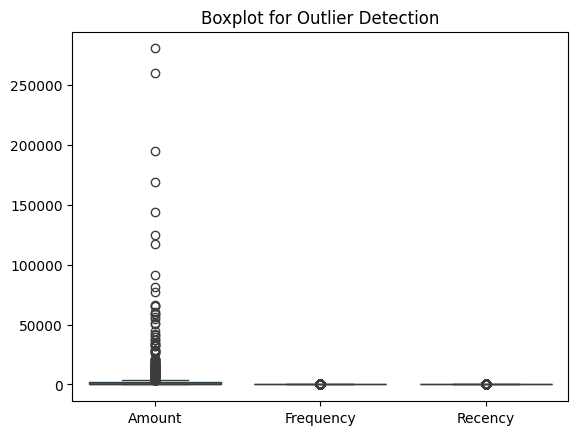

In [ ]:
# Cek outlier dengan visualisasi boxplot
sns.boxplot(data=df_prep[['Amount', 'Frequency', 'Recency']])
plt.title("Boxplot for Outlier Detection")
plt.show()
# Menghilangkan outlier dengan IQR
# Definisi fungsi untuk menghilangkan outlier
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Kuartil pertama
    Q3 = df[column].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1                   # Rentang antar kuartil
    lower_bound = Q1 - 1.5 * IQR    # Batas bawah
    upper_bound = Q3 + 1.5 * IQR    # Batas atas

    # Filter data di dalam range
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Menghilangkan outlier untuk setiap kolom numerik
for col in ['Amount', 'Frequency', 'Recency']:
    df_prep = remove_outliers(df_prep, col)

# Reset index setelah menghapus outlier
df_prep = df_prep.reset_index(drop=True)

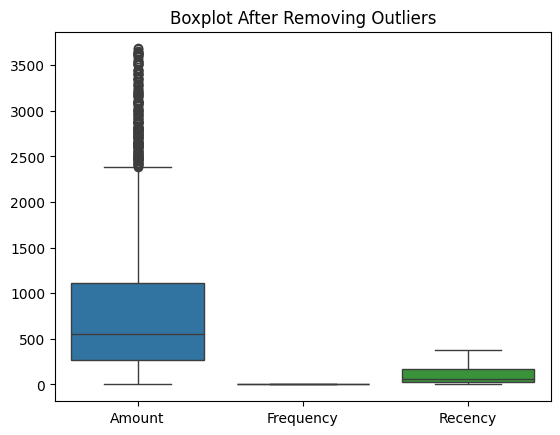

In [ ]:
sns.boxplot(data=df_prep[['Amount', 'Frequency', 'Recency']])
plt.title("Boxplot After Removing Outliers")
plt.show()


## Data Normalization

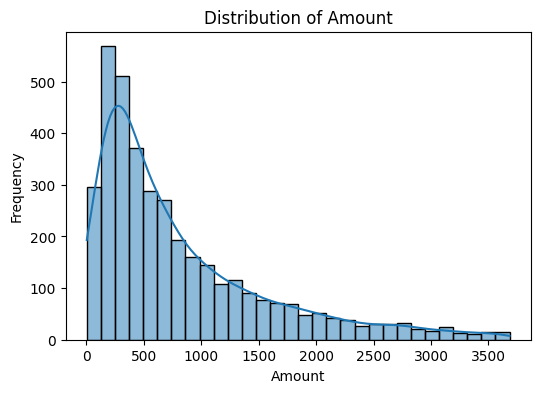

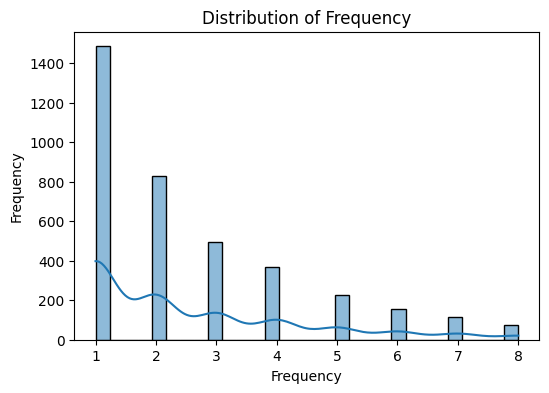

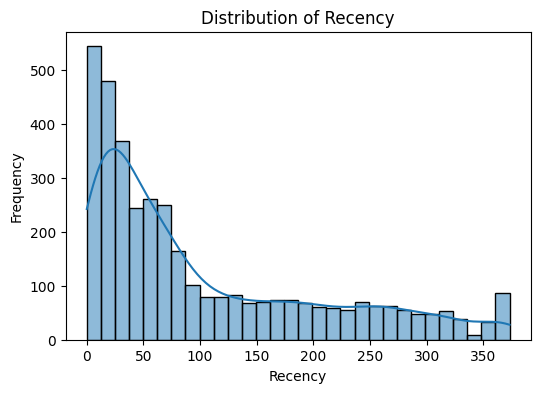

In [ ]:
# Cek distribusi data (normal/tidak) dengan visualisasi histplot/distplot
# Plot histogram untuk masing-masing kolom
for col in ['Amount', 'Frequency', 'Recency']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_prep[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
# Normalisasi data dengan scaler (normal pakai StandardScaler, tidak normal pakai MinMaxScaler)

In [ ]:
# Normalisasi data dengan scaler (normal pakai StandardScaler, tidak normal pakai MinMaxScaler)
# Buat instance scaler
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Jika data berdistribusi normal, gunakan StandardScaler
if df_prep[['Amount', 'Frequency', 'Recency']].skew().abs().max() < 1:
    df_prep[['Amount', 'Frequency', 'Recency']] = standard_scaler.fit_transform(df_prep[['Amount', 'Frequency', 'Recency']])
    print("Data dinormalisasi dengan StandardScaler (karena distribusi normal).")
else:
    # Jika data tidak normal, gunakan MinMaxScaler
    df_prep[['Amount', 'Frequency', 'Recency']] = minmax_scaler.fit_transform(df_prep[['Amount', 'Frequency', 'Recency']])
    print("Data dinormalisasi dengan MinMaxScaler (karena distribusi tidak normal).")

Data dinormalisasi dengan MinMaxScaler (karena distribusi tidak normal).


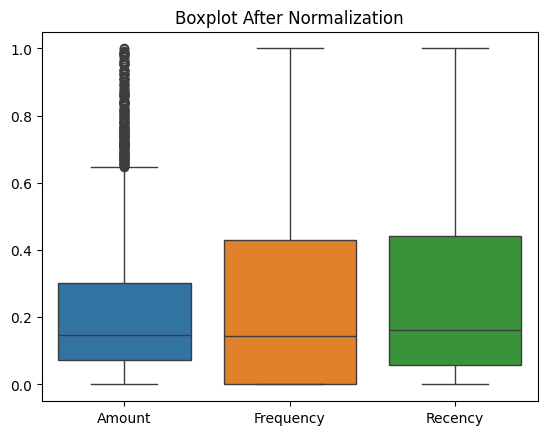

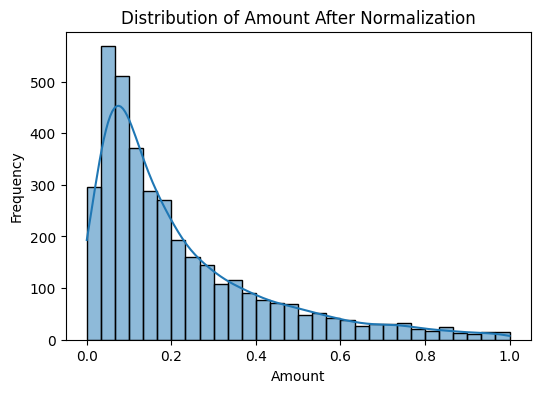

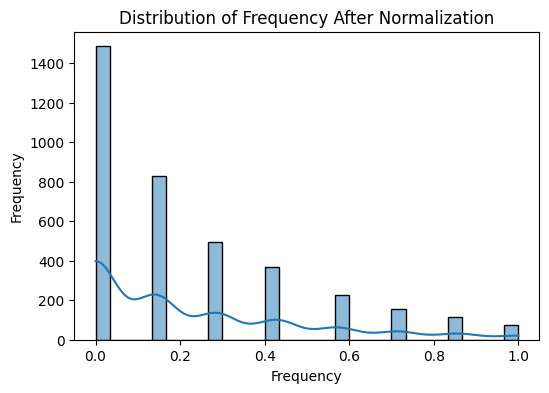

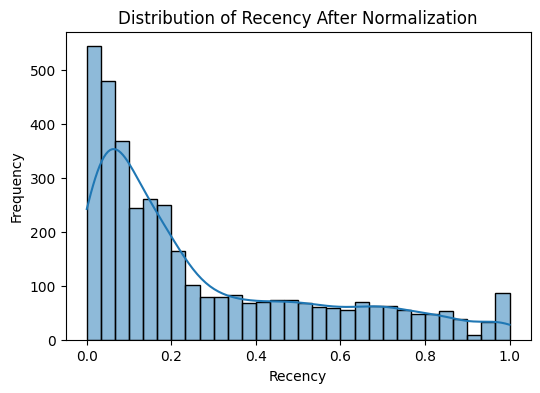

In [ ]:
#Cek Data Setelah di Normalisai
sns.boxplot(data=df_prep[['Amount', 'Frequency', 'Recency']])
plt.title("Boxplot After Normalization")
plt.show()

for col in ['Amount', 'Frequency', 'Recency']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_prep[col], kde=True, bins=30)
    plt.title(f'Distribution of {col} After Normalization')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# MODELING

## Elbow Method

In [ ]:
# Menentukan nilai k (jumlah cluster) dengan Elbow Method
k_range = range(1, 11)  # Misalnya 1 sampai 10
inertia = []  # List untuk menyimpan nilai inertia

# Hitung inertia untuk setiap k
for k in k_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42)  # Buat model KMedoids
    kmedoids.fit(df_prep)  # Latih model dengan data
    inertia.append(kmedoids.inertia_)  # Simpan inertia (WSS)

# Pilih nilai k berdasarkan titik dari kurva yang menunjukan adanya penurunan (titik pertemuan garis atas dan garis bawah yg membentuk seperti siku, biasanya garis setelah titik tsb tidak terlihat kaku)

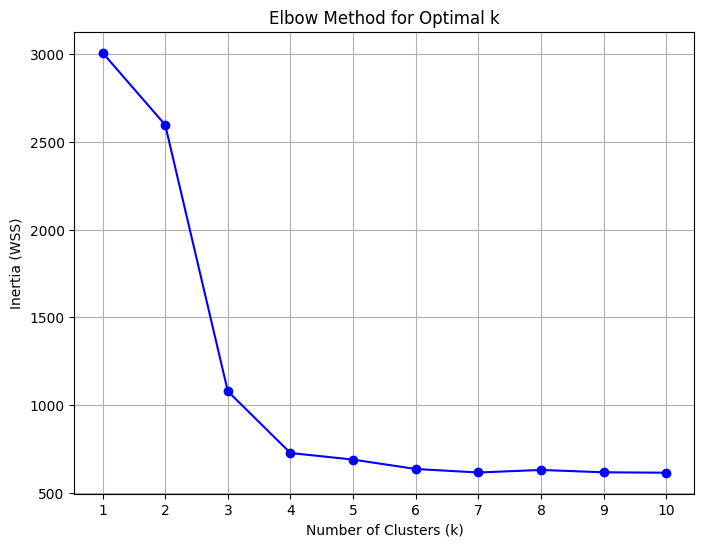

In [ ]:
#visualisasi Elbow
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## Clustering

In [ ]:
# Mengimplementasikan k-medoids dengan jumlah cluster sesuai hasil elbow method
# Jumlah cluster dari Elbow Method
optimal_k = 4

# Inisialisasi model K-Medoids
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)

# Fit dan prediksi cluster
df_prep['Cluster'] = kmedoids.fit_predict(df_prep)

# Tampilkan hasil cluster
print("Cluster Labels:", df_prep['Cluster'].unique())
print(df_prep['Cluster'].value_counts())
# Menampilkan nilai silhoutte score (akurasi clustering) jika perlu
score = silhouette_score(df_prep, df_prep['Cluster'])
print(f"\nSilhouette Score: {score:.4f}")

Cluster Labels: [0 2 3 1]
Cluster
3    1123
2     955
0     924
1     747
Name: count, dtype: int64

Silhouette Score: 0.7766


### Visualisasi

#### 3D

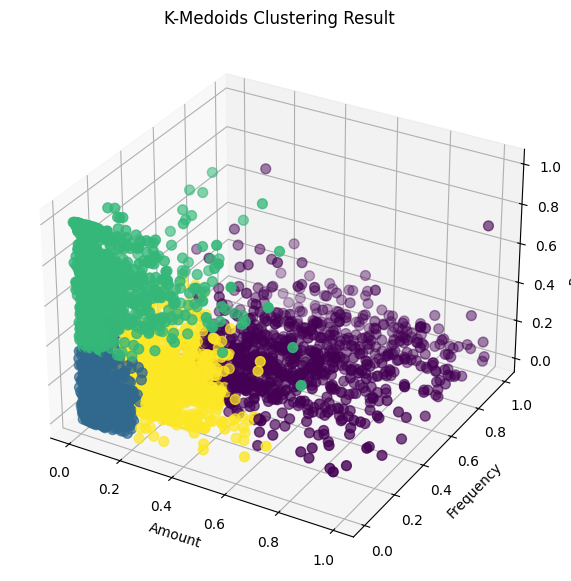

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_prep['Amount'],        # Sumbu X
    df_prep['Frequency'],     # Sumbu Y
    df_prep['Recency'],       # Sumbu Z
    c=df_prep['Cluster'],     # Warna berdasarkan cluster
    cmap='viridis',      # Pilih colormap
    s=50                 # Ukuran titik
)

ax.set_xlabel('Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('K-Medoids Clustering Result')

plt.show()

In [ ]:
for cluster in range(optimal_k):
    print(f"Cluster {cluster}:")
    print(df_prep[df_prep['Cluster'] == cluster].head(), "\n")

Cluster 0:
      Amount  Frequency   Recency  Cluster
0   0.256650   0.571429  0.254692        0
2   0.543973   0.857143  0.233244        0
8   0.803984   0.857143  0.029491        0
9   0.960738   0.714286  0.042895        0
10  0.225300   0.428571  0.018767        0 

Cluster 1:
       Amount  Frequency   Recency  Cluster
57   0.048124   0.142857  0.340483        1
388  0.068028   0.142857  0.319035        1
437  0.031860   0.142857  0.415550        1
817  0.075772   0.142857  0.404826        1
962  0.086739   0.142857  0.410188        1 

Cluster 2:
      Amount  Frequency   Recency  Cluster
1   0.237017   0.285714  0.892761        2
3   0.132021   0.000000  1.000000        2
5   0.104804   0.142857  0.697051        2
7   0.020611   0.000000  1.000000        2
11  0.051316   0.000000  1.000000        2 

Cluster 3:
      Amount  Frequency   Recency  Cluster
4   0.161702   0.285714  0.131367        3
6   0.192415   0.285714  0.018767        3
16  0.184609   0.142857  0.088472        

Description:<br>
Cluster 0: very high Amount, very high Frequency, dan low Recency<br>
Cluster 1: low Amount, low Frequency, dan low Recency<br>
Cluster 2: low Amount, low Frequency, dan very high Recency<br>
Cluster 3: medium Amount, high Frequency, dan low Recency<br>

Amount

mean Q1 (25%): 0.130655<br>
mean Q2 (50%): 0.195709<br>
mean Q3 (75%): 0.278465<br><br>


Frequency<br>

mean Q1: 0,142857<br>
mean Q2: 0,1785715<br>
mean Q3: 0,28571425<br><br>

Recency<br>

mean Q1: 0,172252<br>
mean Q2: 0,246984<br>
mean Q3: 0,34752<br><br>

Low: mean ≤ Q1<br>
Medium: Q1 < mean ≤ Median<br>
High: Median < mean ≤ Q3<br>
Very High: mean > Q3<br>

In [ ]:
df_prep.groupby('Cluster')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,924.0,0.489186,0.210248,0.018008,0.324218,0.457648,0.630495,1.000000
1,747.0,0.079641,0.049176,0.000666,0.042302,0.068631,0.106059,0.248868
2,955.0,0.103741,0.097740,0.000000,0.042122,0.079957,0.124837,0.840260
3,1123.0,0.193689,0.106639,0.008915,0.113978,0.174601,0.254469,0.712628


In [ ]:
df_prep.groupby('Cluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,924.0,0.594465,0.208651,0.0,0.428571,0.571429,0.714286,1.000000
1,747.0,0.004207,0.024169,0.0,0.000000,0.000000,0.000000,0.142857
2,955.0,0.049813,0.096895,0.0,0.000000,0.000000,0.142857,0.714286
3,1123.0,0.206208,0.101389,0.0,0.142857,0.142857,0.285714,0.428571


In [ ]:
df_prep.groupby('Cluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,924.0,0.103655,0.112142,0.000000,0.024129,0.065684,0.147453,0.806971
1,747.0,0.156770,0.101673,0.000000,0.075067,0.139410,0.214477,0.415550
2,955.0,0.686686,0.169773,0.383378,0.541555,0.678284,0.821716,1.000000
3,1123.0,0.140647,0.116311,0.000000,0.048257,0.104558,0.206434,0.493298


#### 2D

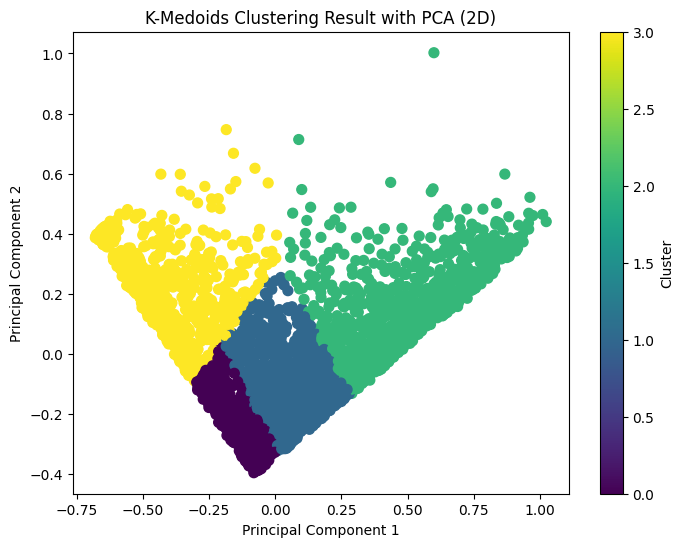

In [ ]:
# Reduksi dimensi data ke 2 komponen utama menggunakan PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_prep.drop(columns=['Cluster']))

# Membuat scatter plot 2D dengan hasil PCA
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_prep['Cluster'], cmap='viridis', s=50)

# Menambahkan label untuk sumbu dan judul
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Medoids Clustering Result with PCA (2D)')

# Menambahkan color bar untuk menunjukkan cluster
plt.colorbar(label='Cluster')

plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Reduksi dimensi data menjadi 2 komponen utama menggunakan PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_prep.drop(columns=['Cluster']))

# Membuat DataFrame baru untuk menampilkan hasil clustering dan komponen PCA
df_clustered = pd.DataFrame(reduced_data, columns=['Principal Component 1', 'Principal Component 2'])

# Menambahkan kolom Cluster dari hasil clustering K-Medoids
df_clustered['Cluster'] = df_prep['Cluster']


# Menampilkan tabel hasil
print(df_clustered)

      Principal Component 1  Principal Component 2  Cluster
0                  0.256162               0.159842        2
1                 -0.324260               0.528608        3
2                  0.587266               0.387028        2
3                 -0.623572               0.441213        3
4                  0.100543              -0.107208        1
...                     ...                    ...      ...
3744              -0.058382              -0.384123        0
3745              -0.040127              -0.368505        0
3746              -0.036455              -0.368882        0
3747              -0.052967              -0.383009        0
3748               0.024375              -0.316839        1

[3749 rows x 3 columns]


# batas suci

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Menentukan nilai k (jumlah cluster) dengan Elbow Method
k_range = range(1, 11)  # Misalnya 1 sampai 10
inertia = []  # List untuk menyimpan nilai inertia

# Hitung inertia untuk setiap k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Buat model KMedoids
    kmeans.fit(df_prep)  # Latih model dengan data
    inertia.append(kmeans.inertia_)  # Simpan inertia (WSS)

# Pilih nilai k berdasarkan titik dari kurva yang menunjukan adanya penurunan (titik pertemuan garis atas dan garis bawah yg membentuk seperti siku, biasanya garis setelah titik tsb tidak terlihat kaku)

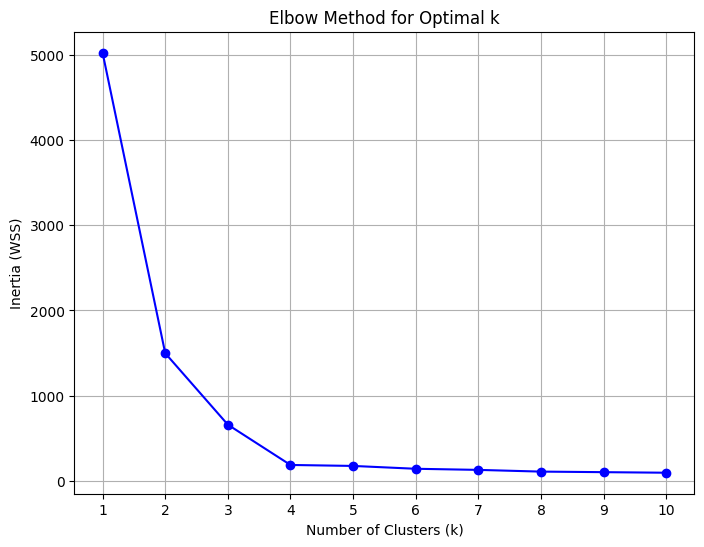

In [ ]:
#visualisasi Elbow
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_prep['Cluster'] = kmeans.fit_predict(df_prep)

print(df_prep.head())
print(df_prep['Cluster'].value_counts())

     Amount  Frequency   Recency  Cluster
0  0.256650   0.571429  0.254692        1
1  0.237017   0.285714  0.892761        2
2  0.543973   0.857143  0.233244        1
3  0.132021   0.000000  1.000000        2
4  0.161702   0.285714  0.131367        0
Cluster
1    1671
0    1123
2     955
Name: count, dtype: int64


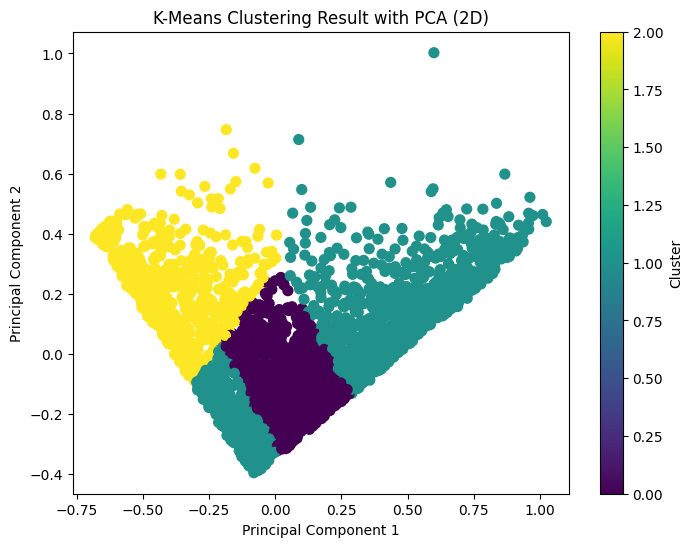

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduksi dimensi data ke 2 komponen utama menggunakan PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_prep.drop(columns=['Cluster']))

# Membuat scatter plot 2D dengan hasil PCA
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_prep['Cluster'], cmap='viridis', s=50)

# Menambahkan label untuk sumbu dan judul
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Result with PCA (2D)')

# Menambahkan color bar untuk menunjukkan cluster
plt.colorbar(label='Cluster')

plt.show()


In [ ]:
for cluster in range(optimal_k):
    print(f"Cluster {cluster}:")
    print(df_prep[df_prep['Cluster'] == cluster].head(), "\n")

Cluster 0:
      Amount  Frequency   Recency  Cluster
4   0.161702   0.285714  0.131367        0
6   0.192415   0.285714  0.018767        0
16  0.184609   0.142857  0.088472        0
17  0.107540   0.142857  0.021448        0
23  0.152944   0.285714  0.461126        0 

Cluster 1:
      Amount  Frequency   Recency  Cluster
0   0.256650   0.571429  0.254692        1
2   0.543973   0.857143  0.233244        1
8   0.803984   0.857143  0.029491        1
9   0.960738   0.714286  0.042895        1
10  0.225300   0.428571  0.018767        1 

Cluster 2:
      Amount  Frequency   Recency  Cluster
1   0.237017   0.285714  0.892761        2
3   0.132021   0.000000  1.000000        2
5   0.104804   0.142857  0.697051        2
7   0.020611   0.000000  1.000000        2
11  0.051316   0.000000  1.000000        2 

